***Cotton Leaf Disease Detection Model Training Code***

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, optimizers, models

from tensorflow.keras.applications.mobilenet import MobileNet 

In [3]:
D_path="Cotton Leaf Disease Detection/Dataset"

In [4]:
names=os.listdir(D_path)
names

['fussarium_wilt', 'curl_virus', 'healthy', 'bacterial_blight']

# Data Pre Processing

In [5]:
trainGen=ImageDataGenerator(
                             rescale=1./255,
                             validation_split=0.2,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             zoom_range=0.2,
                             shear_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

valGen=ImageDataGenerator(rescale=1./255,
                         validation_split=0.2)

In [6]:
trainGen= trainGen.flow_from_directory(
                                              D_path,
                                              batch_size=30,
                                              target_size=(200,200),
                                              class_mode='categorical',
                                              subset="training"
                                            )

valGen= valGen.flow_from_directory(
                                              D_path,
                                              batch_size=20,
                                              target_size=(200,200),
                                              class_mode='categorical',
                                              subset="validation"
                                            )

Found 1369 images belonging to 4 classes.
Found 340 images belonging to 4 classes.


In [7]:
labels=trainGen.class_indices
labels

{'bacterial_blight': 0, 'curl_virus': 1, 'fussarium_wilt': 2, 'healthy': 3}

# Display some Images

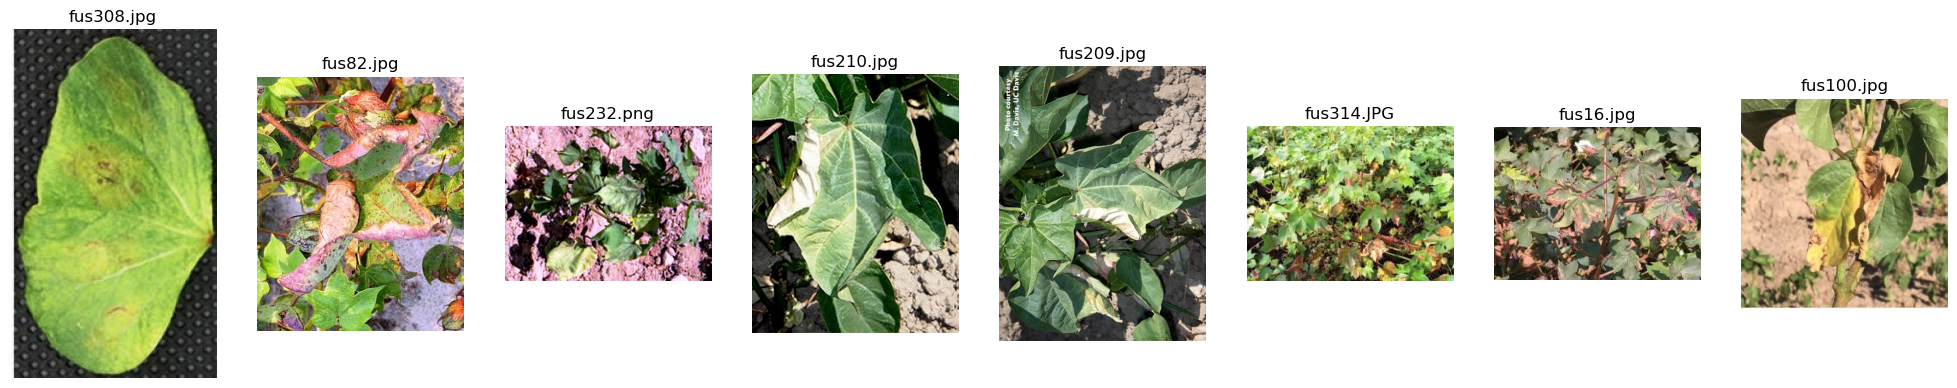

In [8]:
import random
import cv2

directory = "Cotton Leaf Disease Detection/Dataset/fussarium_wilt"

file_list = os.listdir(directory)

num_images = 8

selected_files = random.sample(file_list, num_images)

fig, axs = plt.subplots(1, num_images, figsize=(25, 5))

for i, filename in enumerate(selected_files):
    
    image = cv2.imread(os.path.join(directory, filename))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
   
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(filename)
    
plt.show()

# MobileNet Pre_trained Model

In [9]:
preTrainedModel=MobileNet(input_shape=(200,200,3),  include_top=False,  weights='imagenet')

17225924/17225924 [==============================] - 0s 0us/step


In [10]:
for layer in preTrainedModel.layers:
  layer.trainable=False

In [11]:
preTrainedModel.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 100, 100, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 100, 100, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 100, 100, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 100, 100, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 100, 100, 32)     128       
 ation)                                         

In [12]:
print("Last layer Output Shape: ", preTrainedModel.output_shape)

lastOutput= preTrainedModel.output

Last layer Output Shape:  (None, 6, 6, 1024)


# Creating Network Architecture

In [13]:
inputt=layers.Flatten()(lastOutput)
inputt=layers.Dense(256, activation='relu')(inputt)
inputt=layers.Dropout(0.5)(inputt)
inputt=layers.Dense(32, activation='relu')(inputt)
inputt=layers.Dense(4, activation='softmax')(inputt)

model=models.Model(preTrainedModel.input, inputt)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 100, 100, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 100, 100, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 100, 100, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 100, 100, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 100, 100, 32)     128       
 ation)                                                      

In [15]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training

In [16]:
history=model.fit(trainGen, epochs=45, validation_data=valGen)

Epoch 1/45
46/46 [==============================] - 40s 694ms/step - loss: 1.1744 - accuracy: 0.6056 - val_loss: 0.4901 - val_accuracy: 0.8118
Epoch 2/45
46/46 [==============================] - 18s 384ms/step - loss: 0.4735 - accuracy: 0.8364 - val_loss: 0.3491 - val_accuracy: 0.8794
Epoch 3/45
46/46 [==============================] - 17s 364ms/step - loss: 0.3673 - accuracy: 0.8722 - val_loss: 0.2894 - val_accuracy: 0.8824
Epoch 4/45
46/46 [==============================] - 18s 386ms/step - loss: 0.3040 - accuracy: 0.8970 - val_loss: 0.2107 - val_accuracy: 0.9265
Epoch 5/45
46/46 [==============================] - 17s 375ms/step - loss: 0.2335 - accuracy: 0.9167 - val_loss: 0.1729 - val_accuracy: 0.9382
Epoch 6/45
46/46 [==============================] - 17s 366ms/step - loss: 0.1982 - accuracy: 0.9248 - val_loss: 0.1822 - val_accuracy: 0.9324
Epoch 7/45
46/46 [==============================] - 18s 385ms/step - loss: 0.2068 - accuracy: 0.9248 - val_loss: 0.1406 - val_accuracy: 0.9412

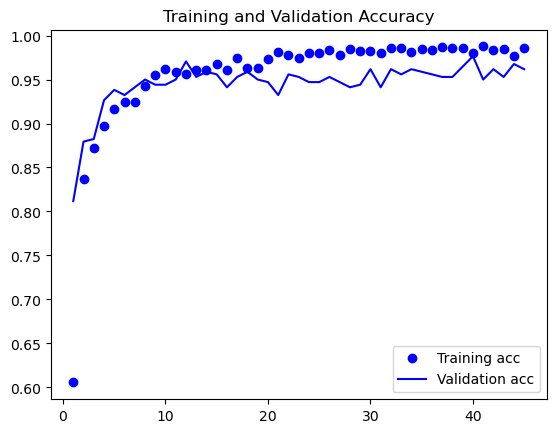

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

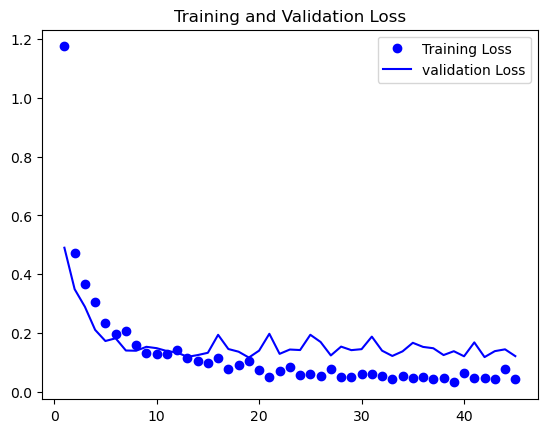

In [18]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs= range(1,len(loss)+1)
plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [21]:
model.save("Cotton Leaf Disease Detection Model.h5")

In [20]:
loss, acc= model.evaluate(valGen)
print("Test Accuracy: ", acc)
print("Test Loss: ", loss)

17/17 [==============================] - 1s 72ms/step - loss: 0.1215 - accuracy: 0.9618
Test Accuracy:  0.9617646932601929
Test Loss:  0.12147344648838043


# Tensorflow Model Convert into Tensorflow Lite

In [23]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite = converter.convert()

with open(r"model.tflite", 'wb') as f:
    f.write(tflite)